In [63]:
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import product

In [64]:
class Dummy_obj:
    def __init__(self, onnx, vnnlib, n_splits, ot, st, bt, res_o, res_s, res_b):
        self.onnx, self.vnnlib, self.n_splits = onnx, vnnlib, int(n_splits)
        self.ot, self.st, self.bt = float(ot), float(st), float(bt)
        self.res_o, self.res_s, self.res_b = res_o, res_s, res_b
    def __str__(self):
        return f"Instance: {self.onnx}, {self.vnnlib}, {self.n_splits}, {self.res_o}, {self.res_b}, {self.res_s}, {self.ot}, {self.bt}, {self.st}"

In [68]:
def load_csv(file):
    with open(file) as f:
        f.readline()
        rows = []
        for l in f:
#             onnx,vnnlib,strategy,mask,n_splits,original_r,original_t,splitted_r,splitted_t,baseline_r,baseline_t
            fileds = l.split(',')
            assert len(fileds)==11
            if fileds[4] == "SKIPPED":
                rows.append( Dummy_obj(fileds[0], fileds[1], -1, -1, -1, -1, -1, -1, -1) )
                continue
            rows.append( Dummy_obj(fileds[0], fileds[1], fileds[4], 
                                   fileds[6], fileds[8], fileds[10], 
                                   fileds[5], fileds[7], fileds[9]) )
    return (file.stem, rows)
            

In [71]:
exp1_path = Path("/Users/linhan/relusplitter/experiment/results/exp1")

In [79]:
results = []
for f in exp1_path.iterdir():
    print(f)
    if f.suffix != ".csv":
        continue
    if "marabou" in f.stem:
        continue
    results.append(load_csv(f))
    
acasxu_results = [f for f in results if "acasxu" in f[0]]
mnist_results = [f for f in results if "mnist" in f[0]]
results = [f for f in results if "acasxu" not in f[0]]

/Users/linhan/relusplitter/experiment/results/exp1/tllverifybench~marabou~stable~random~1.csv
/Users/linhan/relusplitter/experiment/results/exp1/acasxu~nnenum~stable~random~1.csv
/Users/linhan/relusplitter/experiment/results/exp1/mnist_fc~nnenum~stable~random~1.csv
/Users/linhan/relusplitter/experiment/results/exp1/acasxu~abcrown~stable~random~1.csv
/Users/linhan/relusplitter/experiment/results/exp1/mnist_fc~neuralsat~stable~random~1.csv
/Users/linhan/relusplitter/experiment/results/exp1/mnist_fc~marabou~stable~random~1.csv
/Users/linhan/relusplitter/experiment/results/exp1/mnist_fc~abcrown~stable~random~1.csv
/Users/linhan/relusplitter/experiment/results/exp1/acasxu~marabou~stable~random~1.csv
/Users/linhan/relusplitter/experiment/results/exp1/acasxu~neuralsat~stable~random~1.csv
/Users/linhan/relusplitter/experiment/results/exp1/tllverifybench~abcrown~stable~random~1.csv
/Users/linhan/relusplitter/experiment/results/exp1/tllverifybench~neuralsat~stable~random~1.csv


In [80]:
easy_acasxu = []
for rname, dps in acasxu_results:
#     new_dps = [i for i in dps if i.st/i.ot < 2 and (i.st != -1)]
    new_dps = [i for i in dps if (i.st-i.ot) < 1 and (i.st != -1)]
    
    easy_acasxu.append((rname, new_dps))

easy_mnist = []
for rname, dps in mnist_results:
    new_dps = [i for i in dps if (i.st-i.ot) < 1 and (i.st != -1)]
    easy_mnist.append((rname, new_dps))
    
    
    

In [84]:
for r, dps in easy_mnist:
    print(r)
    for d in dps:
        print(d.onnx, d.vnnlib)
        print(d.res_o)
#         print(d.ot, d.st)

mnist_fc~nnenum~stable~random~1
mnist-net_256x2 prop_3_0.03
unsat
mnist-net_256x2 prop_7_0.03
unsat
mnist-net_256x2 prop_9_0.03
unsat
mnist-net_256x2 prop_11_0.03
unsat
mnist-net_256x2 prop_12_0.03
sat
mnist-net_256x2 prop_13_0.03
unsat
mnist-net_256x2 prop_14_0.03
unsat
mnist-net_256x2 prop_12_0.05
sat
mnist_fc~neuralsat~stable~random~1
mnist-net_256x2 prop_1_0.03
sat
mnist-net_256x2 prop_3_0.03
unsat
mnist-net_256x2 prop_7_0.03
unsat
mnist-net_256x2 prop_9_0.03
unsat
mnist-net_256x2 prop_11_0.03
unsat
mnist-net_256x2 prop_12_0.03
sat
mnist-net_256x2 prop_13_0.03
unsat
mnist-net_256x2 prop_14_0.03
unsat
mnist-net_256x2 prop_0_0.05
sat
mnist-net_256x2 prop_1_0.05
sat
mnist-net_256x2 prop_2_0.05
sat
mnist-net_256x2 prop_4_0.05
sat
mnist-net_256x2 prop_5_0.05
sat
mnist-net_256x2 prop_6_0.05
sat
mnist-net_256x2 prop_7_0.05
unsat
mnist-net_256x2 prop_8_0.05
sat
mnist-net_256x2 prop_12_0.05
sat
mnist-net_256x2 prop_13_0.05
unsat
mnist-net_256x2 prop_14_0.05
unsat
mnist-net_256x4 prop_1_0.03

In [75]:
def exp1_graphing(result, filter_fn = None):
    title, instances = result
    print(f"graphing {title}...")
    
    filtered = [i for i in instances if i.n_splits != -1]
    for i in instances:
        res_mismatch = [('sat', 'unsat'), ('unsat', 'sat')]
        if ((i.res_o, i.res_s) in res_mismatch) or ((i.res_o, i.res_b) in res_mismatch):
            print(f"ResMismatch: {i}")
        
    removed = [i for i in instances if i.n_splits == -1]
    sat_instances = [i for i in filtered if i.res_o == 'sat']
    unsat_instances = [i for i in filtered if i.res_o == 'unsat']
    print(f"total:{len(instances)}\t sat:{len(sat_instances)}\t unsat:{len(unsat_instances)}\t filtered:{len(removed)}")
        
    
    onnx_labels = list(sorted(set(dp.onnx for dp in instances)))
    onnx_map = {label: idx for idx, label in enumerate(onnx_labels)}
    instances.sort(key=lambda x: x.onnx)
    offset = 0.1
    sat_offset = 0.4
    line_width = 0.6
    
    plt.figure(figsize=(20,9))
    
    # UNSAT
    ys_ot = [onnx_map[dp.onnx] for dp in unsat_instances]  # Y-values mapped to numeric indices
    ys_st = [y+offset for y in ys_ot]
    ys_bt = [y+offset for y in ys_st]
    ot = [dp.ot for dp in unsat_instances]
    st = [dp.st for dp in unsat_instances]  # ST values
    bt = [dp.bt for dp in unsat_instances]  # BT values
    

    plt.scatter(ys_ot, ot, color="green", label="Original Instances(UNSAT)", marker='.')
    plt.scatter(ys_bt, bt, color="cyan", label="Baseline Instances(UNSAT)", marker='.')
    plt.scatter(ys_st, st, color="red", label="Splitted Instances(UNSAT)", marker='.')
    
    plt.plot([ys_ot, ys_bt], [ot, bt], linestyle='--', color='gray', linewidth=line_width)
    plt.plot([ys_ot, ys_st], [ot, st], linestyle='--', color='gray', linewidth=line_width)
    plt.plot([ys_bt, ys_st], [bt, st], linestyle='--', color='gray', linewidth=line_width)
    
    # SAT
    ys_ot = [onnx_map[dp.onnx]+sat_offset for dp in sat_instances]  # Y-values mapped to numeric indices
    ys_st = [y+offset for y in ys_ot]
    ys_bt = [y+offset for y in ys_st]
    ot = [dp.ot for dp in sat_instances]
    st = [dp.st for dp in sat_instances]  # ST values
    bt = [dp.bt for dp in sat_instances]  # BT values
    

    plt.scatter(ys_ot, ot, color="green", label="Original Instances(SAT)", marker='^')
    plt.scatter(ys_bt, bt, color="cyan", label="Baseline Instances(SAT)", marker='^')
    plt.scatter(ys_st, st, color="red", label="Splitted Instances(SAT)", marker='^')
    
    plt.plot([ys_ot, ys_bt], [ot, bt], linestyle='--', color='gray', linewidth=line_width)
    plt.plot([ys_ot, ys_st], [ot, st], linestyle='--', color='gray', linewidth=line_width)
    plt.plot([ys_bt, ys_st], [bt, st], linestyle='--', color='gray', linewidth=line_width)
    
    plt.xticks(range(len(onnx_labels)), onnx_labels, rotation=45, ha='right')

    
    plt.legend()
    
    
    
    plt.title(title)
    plt.savefig(title)
    plt.show()

In [76]:
def exp1_graphing_acasxu(result, filter_fn = None):
    title, instances = result
    print(f"graphing {title}...")
    
    filtered = [i for i in instances if i.n_splits != -1]
    for i in instances:
        res_mismatch = [('sat', 'unsat'), ('unsat', 'sat')]
        if ((i.res_o, i.res_s) in res_mismatch) or ((i.res_o, i.res_b) in res_mismatch):
            print(f"ResMismatch: {i}")
        
    removed = [i for i in instances if i.n_splits == -1]
    sat_instances = [i for i in filtered if i.res_o == 'sat']
    unsat_instances = [i for i in filtered if i.res_o == 'unsat']
    print(f"total:{len(instances)}\t sat:{len(sat_instances)}\t unsat:{len(unsat_instances)}\t filtered:{len(removed)}")
        
    
    vnnlib_labels = list(sorted(set(dp.vnnlib for dp in instances)))
    vnnlib_map = {label: idx for idx, label in enumerate(vnnlib_labels)}
    instances.sort(key=lambda x: x.vnnlib)
    offset = 0.1
    sat_offset = 0.4
    line_width = 0.6
    
    plt.figure(figsize=(20,9))
    
    # UNSAT
    ys_ot = [vnnlib_map[dp.vnnlib] for dp in unsat_instances]  # Y-values mapped to numeric indices
    ys_st = [y+offset for y in ys_ot]
    ys_bt = [y+offset for y in ys_st]
    ot = [dp.ot for dp in unsat_instances]
    st = [dp.st for dp in unsat_instances]  # ST values
    bt = [dp.bt for dp in unsat_instances]  # BT values
    

    plt.scatter(ys_ot, ot, color="green", label="Original Instances(UNSAT)", marker='.')
    plt.scatter(ys_bt, bt, color="cyan", label="Baseline Instances(UNSAT)", marker='.')
    plt.scatter(ys_st, st, color="red", label="Splitted Instances(UNSAT)", marker='.')
    
    plt.plot([ys_ot, ys_bt], [ot, bt], linestyle='--', color='gray', linewidth=line_width)
    plt.plot([ys_ot, ys_st], [ot, st], linestyle='--', color='gray', linewidth=line_width)
    plt.plot([ys_bt, ys_st], [bt, st], linestyle='--', color='gray', linewidth=line_width)
    
    # SAT
    ys_ot = [vnnlib_map[dp.vnnlib]+sat_offset for dp in sat_instances]  # Y-values mapped to numeric indices
    ys_st = [y+offset for y in ys_ot]
    ys_bt = [y+offset for y in ys_st]
    ot = [dp.ot for dp in sat_instances]
    st = [dp.st for dp in sat_instances]  # ST values
    bt = [dp.bt for dp in sat_instances]  # BT values
    

    plt.scatter(ys_ot, ot, color="green", label="Original Instances(SAT)", marker='^')
    plt.scatter(ys_bt, bt, color="cyan", label="Baseline Instances(SAT)", marker='^')
    plt.scatter(ys_st, st, color="red", label="Splitted Instances(SAT)", marker='^')
    
    plt.plot([ys_ot, ys_bt], [ot, bt], linestyle='--', color='gray', linewidth=line_width)
    plt.plot([ys_ot, ys_st], [ot, st], linestyle='--', color='gray', linewidth=line_width)
    plt.plot([ys_bt, ys_st], [bt, st], linestyle='--', color='gray', linewidth=line_width)
    
    plt.xticks(range(len(vnnlib_labels)), vnnlib_labels, rotation=45, ha='right')

    
    plt.legend()
    
    
    
    plt.title(title)
    plt.savefig(title)
    plt.show()

graphing mnist_fc~nnenum~stable~random~1...
total:90	 sat:11	 unsat:48	 filtered:31


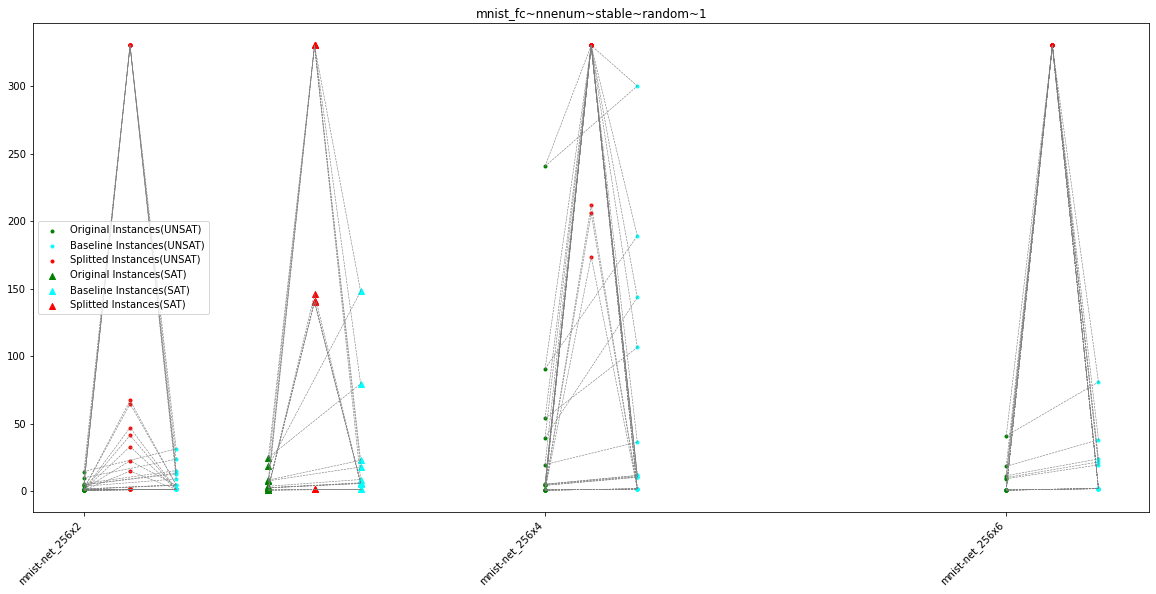

graphing mnist_fc~neuralsat~stable~random~1...
total:90	 sat:17	 unsat:68	 filtered:5


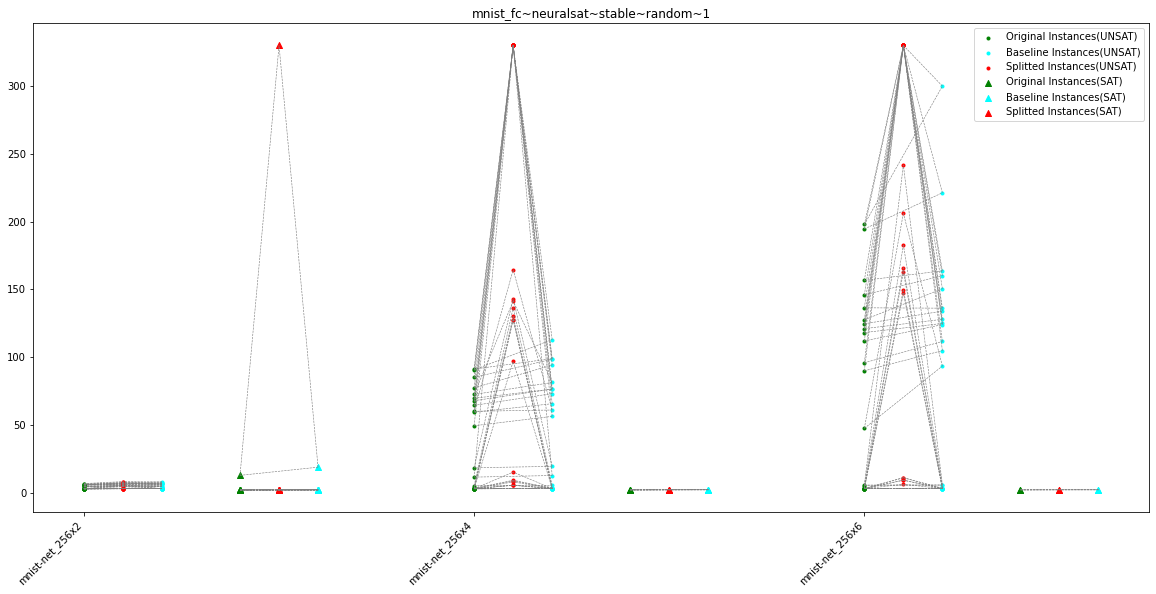

graphing mnist_fc~abcrown~stable~random~1...
total:90	 sat:18	 unsat:46	 filtered:26


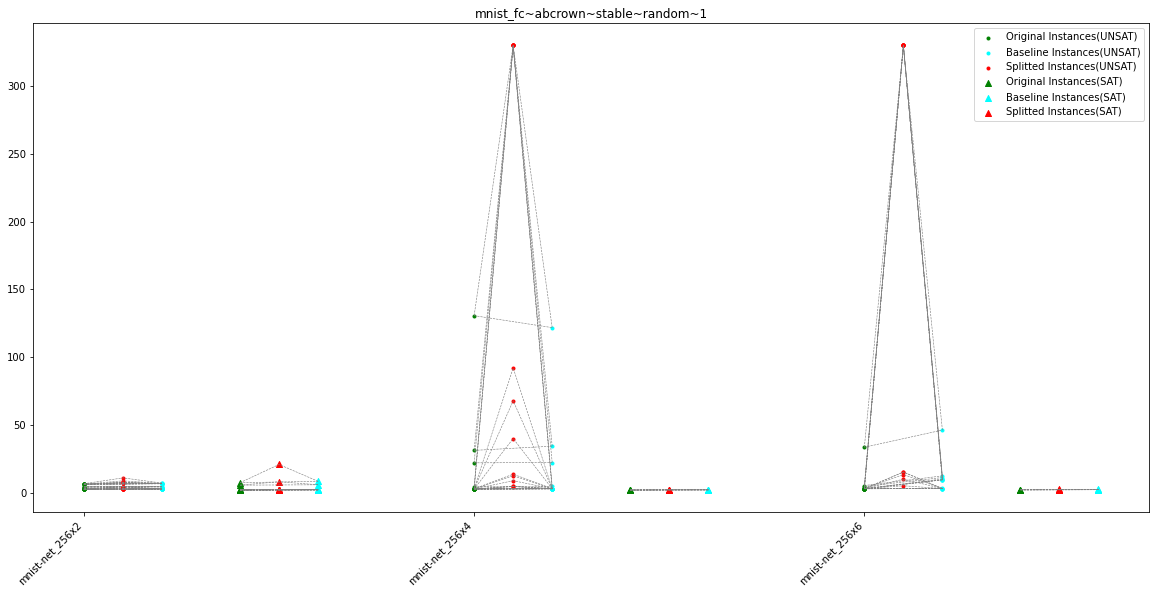

graphing tllverifybench~abcrown~stable~random~1...
total:32	 sat:17	 unsat:15	 filtered:0


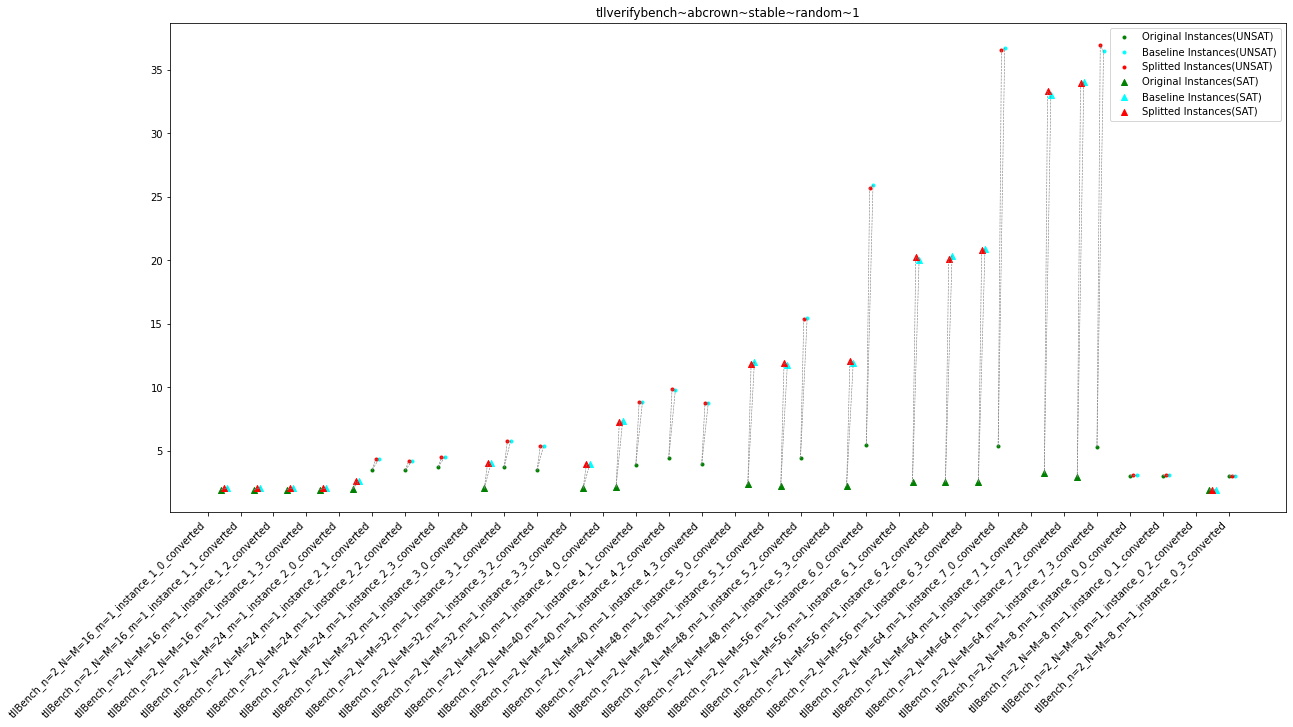

graphing tllverifybench~neuralsat~stable~random~1...
total:32	 sat:17	 unsat:15	 filtered:0


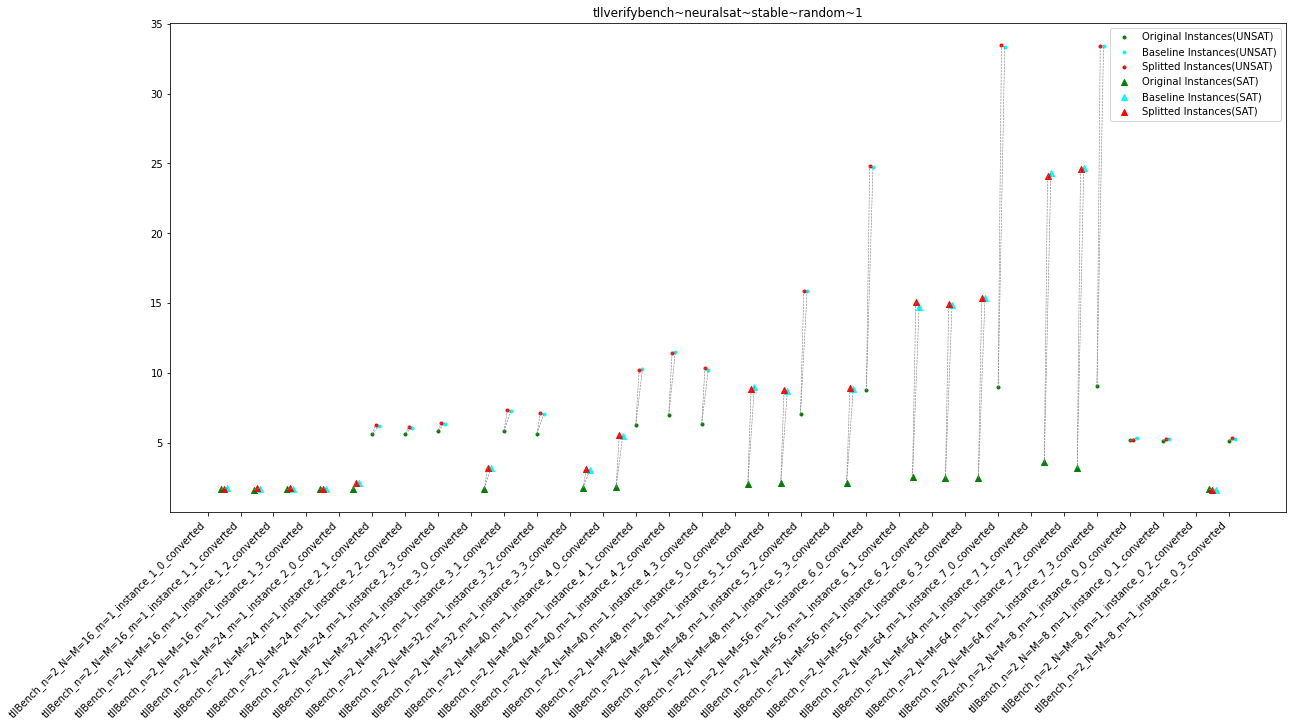

In [77]:
for r in results:
    exp1_graphing(r)

graphing acasxu~nnenum~stable~random~1...
ResMismatch: Instance: ACASXU_run2a_2_4_batch_2000_converted, prop_3, 45, sat, sat, unsat, 0.81, 0.818, 1.7
ResMismatch: Instance: ACASXU_run2a_2_9_batch_2000_converted, prop_3, 44, sat, sat, unsat, 0.793, 0.823, 1.6
ResMismatch: Instance: ACASXU_run2a_5_7_batch_2000_converted, prop_3, 47, sat, sat, unsat, 0.803, 0.834, 1.6
ResMismatch: Instance: ACASXU_run2a_5_9_batch_2000_converted, prop_3, 45, sat, sat, unsat, 0.819, 0.839, 1.6
ResMismatch: Instance: ACASXU_run2a_2_9_batch_2000_converted, prop_4, 40, sat, sat, unsat, 0.819, 0.87, 1.6
total:186	 sat:52	 unsat:134	 filtered:0


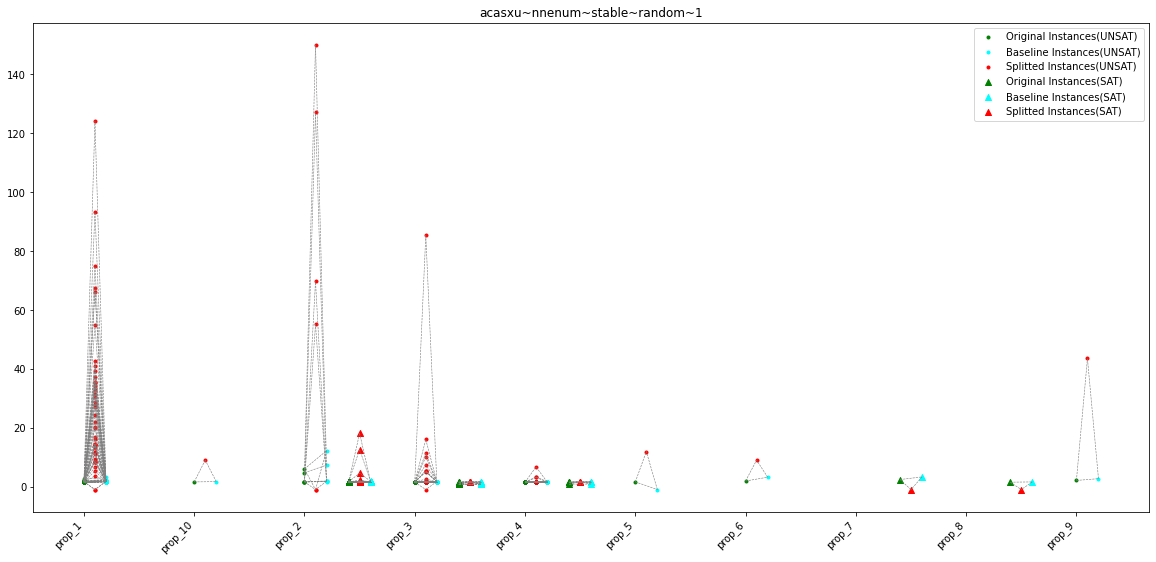

graphing acasxu~abcrown~stable~random~1...
total:186	 sat:47	 unsat:139	 filtered:0


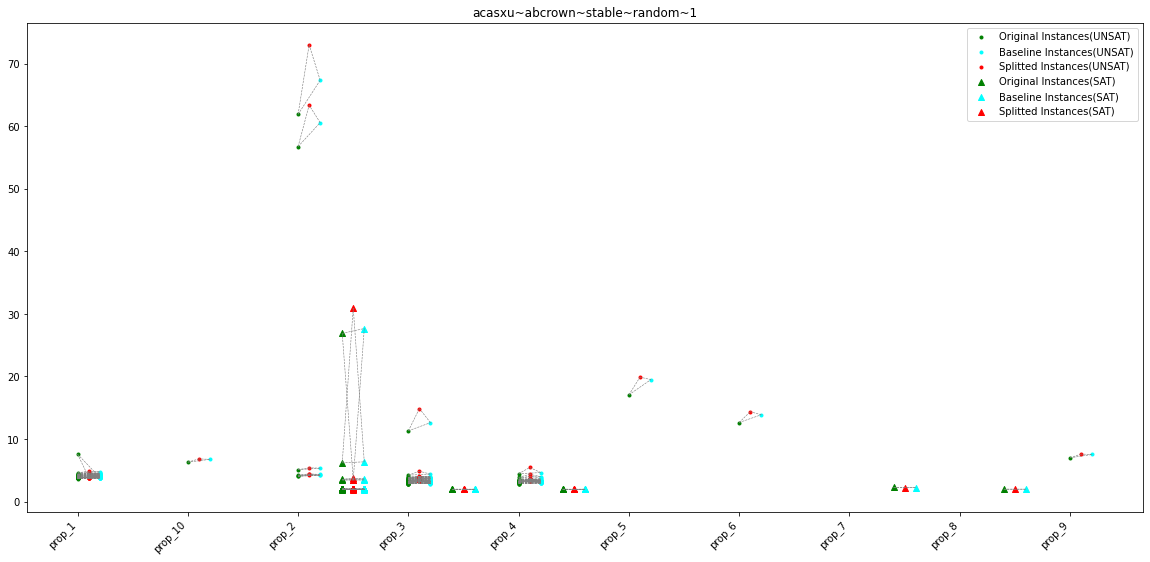

graphing acasxu~neuralsat~stable~random~1...
total:186	 sat:46	 unsat:138	 filtered:2


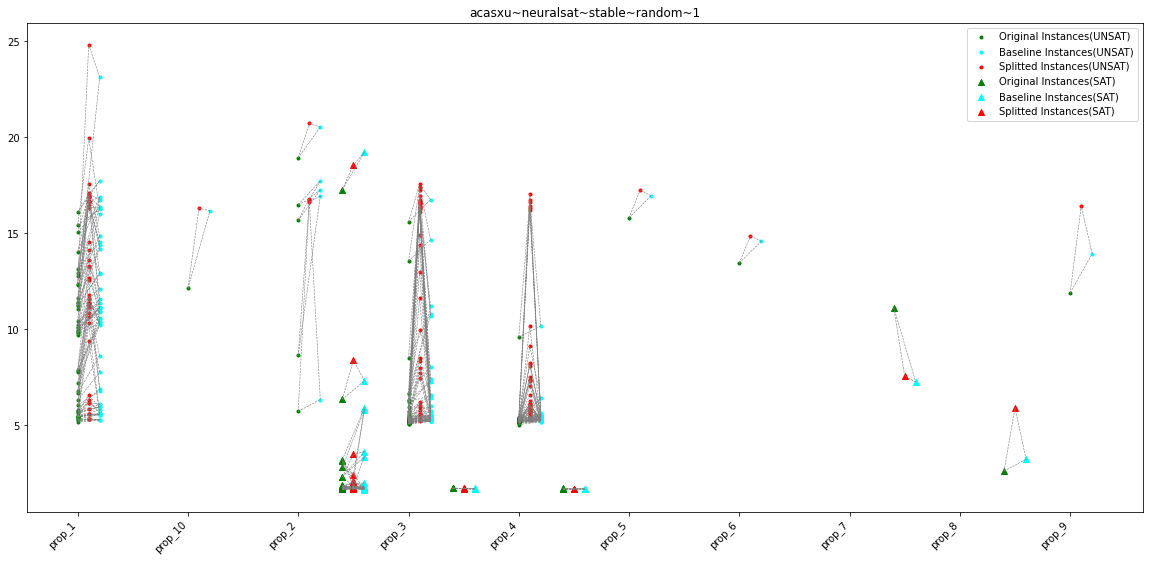

In [78]:
for r in acasxu_results:
    exp1_graphing_acasxu(r)